In [2]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

plt.rcParams['figure.figsize'] = (10,8)

## Question 1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the `KNeighborsClassifier` test set. Hint: the works quite well for this task; you just need to find good hyperparameter values (try a grid search on the `weight` and `n_neighbor` hyperparameters).


In [3]:
# fetch MNIST datset
data = fetch_openml('mnist_784', version=1)

In [4]:
data.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
data.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
X, y = data.data, data.target

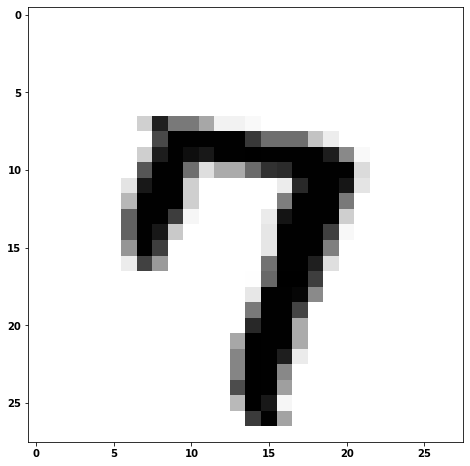

7


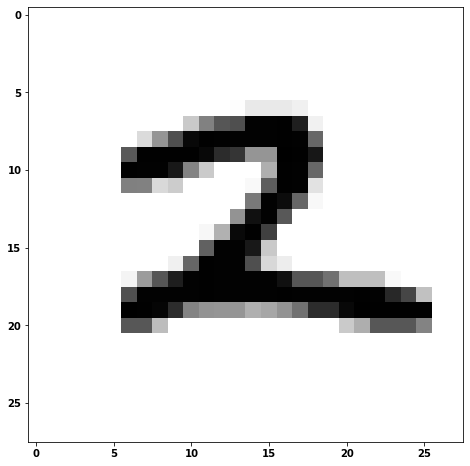

2


In [7]:
# split data train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state = 42)
plt.imshow(x_train[4].reshape(28,28), cmap='binary')
plt.show()
print(y_train[4])

plt.imshow(x_test[7].reshape(28,28), cmap='binary')
plt.show()
print(y_test[7])

In [8]:
y_test, y_train = y_test.astype(np.uint8), y_train.astype(np.uint8)
y_test[7]

2

In [9]:
## KNN classifier as in question

knnclf = KNeighborsClassifier()

In [10]:
y_train

array([0, 4, 4, ..., 1, 0, 0], dtype=uint8)

In [11]:
knnclf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
somedigit = x_test[7]
val = knnclf.predict([somedigit])
print(y_test[7], val)

2 [2]


In [13]:
# cross_val_score(knnclf, x_train, y_train, cv=3, scoring='accuracy')
# output: array([0.96583813, 0.96632584, 0.96491765])

In [14]:
parameters = {
    'n_neighbors':[1,3,5],
    'weights':['uniform', 'distance']
}
gscv = GridSearchCV(knnclf, param_grid=parameters, scoring='accuracy', verbose=10)


In [ ]:
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=1, weights=uniform, score=0.969, total=11.4min
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.4min remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=0.970, total=12.0min
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 23.5min remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=0.971, total=12.8min
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 36.3min remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=0.966, total=11.4min
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 47.7min remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=0.966, total=11.0min
[CV] n_neighbors=1, weights=distance .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 58.7min remaining:    0.0s


[CV] ..... n_neighbors=1, weights=distance, score=0.969, total=11.0min
[CV] n_neighbors=1, weights=distance .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 69.6min remaining:    0.0s


[CV] ..... n_neighbors=1, weights=distance, score=0.970, total=11.0min
[CV] n_neighbors=1, weights=distance .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 80.6min remaining:    0.0s


[CV] ..... n_neighbors=1, weights=distance, score=0.971, total=10.9min
[CV] n_neighbors=1, weights=distance .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 91.5min remaining:    0.0s


[CV] ..... n_neighbors=1, weights=distance, score=0.966, total=10.9min
[CV] n_neighbors=1, weights=distance .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 102.5min remaining:    0.0s


[CV] ..... n_neighbors=1, weights=distance, score=0.966, total=10.9min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=11.6min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.968, total=12.9min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.973, total=11.9min
[CV] n_neighbors=3, weights=uniform ..................................


In [ ]:
gscv.best_estimator_

In [ ]:
r'c:/windows/'